# Importing the libraries

In [35]:
# Importing libraries
import import_ipynb
import numpy as np
import time
import math
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import ticker

# Generate the positive definite matrix A, the vector b in the range of A and the optimal solution x*

In [36]:
# Method of generating a positive semidefinite matrix
# 1. Generate a random square matrix
# 2. multiply it by its own transposition
# 3. we have obtained a positive semi-definite matrix.
def generateRandomPositiveSemidefiniteMatrix(size, scaleDown):
    randomMatrix = np.random.rand(size, size)
    positive_semidefinite_matrix = np.matmul(randomMatrix, randomMatrix.transpose()) / scaleDown
    return positive_semidefinite_matrix

# Generate linearly spacing vector from 1 to size for x*
def generateLinearOptimalX(size):
    return np.arange(1, size + 1, 1).astype(int)

# A matrix is positive semidefinite if all of its eigenvalues are nonnegative
# Note: this matrix should be symmetric
def isPositiveSemidefinite(A):
    return np.all(np.linalg.eigvals(A) >= 0)

# A matrix does not have an inverse if its determinant is equal to 0
def inverse(A):
    return np.linalg.inv(A)

# There are three different test cases: the small scale with dimension of 10, the large scale with dimension of 100 and the huge scale with the dimension of 1000

In [50]:
scales = ["small", "large", "huge"]

for scale in scales:
    
    if scale == "small":
        size = 10
        scaleDown = 1
    elif scale == "large":
        size = 100
        scaleDown = 10
    elif scale == "huge":
        size = 1000
        scaleDown = 100
    print(f"Data generation for the {scale} scale test. Dimension: {size}")

    start = time.time()
    A = generateRandomPositiveSemidefiniteMatrix(size, scaleDown)
    end = time.time()

    print("The matrix A is")
    print(A)

    print("\nTime required to generate the matrix A is")
    print(f"{end - start} seconds")

    # print(f"Is the matrix A positive semidefinite?: {isPositiveSemidefinite(A)}")

    start = time.time()
    invA = inverse(A)
    end = time.time()

    print("\nThe inverse of matrix A is")
    print(invA)

    print("\nTime required to invert the matrix A is")
    print(f"{end - start} seconds")

    # The optimal solution is designed as the natural numbers: 1,2,3,4,5 and so on
    x_opt = generateLinearOptimalX(size)
    print("\nThe optimal solution x* is")
    print(x_opt)

    # b is in the range of A
    # In other words, b is a linear combination of the columns of matrix A
    b = A.dot(x_opt)
    print("\nThe vector b is")
    print(b)
    print("\n\n\n")

    # So we have the identities:
    # Ax* = b or Ax - b = 0
    # A^-1b = x*

    np.save(f"data/{scale}Matrix.npy", A)
    np.save(f"data/{scale}Vector.npy", b)
    np.save(f"data/{scale}Solution.npy", x_opt)

Data generation for the small scale test. Dimension: 10
The matrix A is
[[5.18739286 3.82006574 3.02467891 4.67019152 4.4263327  3.85433794
  3.29062272 3.21637545 3.68674808 2.44198635]
 [3.82006574 3.95598735 2.96634602 3.74129605 3.34534356 2.84943095
  2.56262218 2.73734196 3.29195817 2.18187658]
 [3.02467891 2.96634602 2.83309499 2.97713416 2.88903791 2.4030659
  2.41896517 2.51807188 2.29166691 1.45231162]
 [4.67019152 3.74129605 2.97713416 4.79083468 4.09810121 3.76307602
  3.28039034 3.1383191  3.33488093 2.4079852 ]
 [4.4263327  3.34534356 2.88903791 4.09810121 4.58298378 3.45154963
  2.71213933 3.02208139 3.06182015 1.88265053]
 [3.85433794 2.84943095 2.4030659  3.76307602 3.45154963 3.25389305
  2.68453657 2.45483449 2.70832725 1.83173519]
 [3.29062272 2.56262218 2.41896517 3.28039034 2.71213933 2.68453657
  2.93555239 2.44009243 2.22225287 1.65173892]
 [3.21637545 2.73734196 2.51807188 3.1383191  3.02208139 2.45483449
  2.44009243 2.54214198 2.1846371  1.47177919]
 [3.68674

# Helper functions

In [54]:
# Returns a vector, which is the result of the gradient  
def gradient(A, b, x):
    return A.dot(x) - b

# Returns a scalar, which is the norm of the result above
def gradientNorm(A, b, x):
    return np.linalg.norm(A.dot(x) - b)

# Returns a scalar, which is the norm of the difference between x and x*
def differenceNorm(x, x_opt):
    return np.linalg.norm(x - x_opt)

# Returns a scalar, which is the norm of x
def norm(x):
    return np.linalg.norm(x)

In [55]:
# Plotting the difference norms log ||x - x*||2
def plotDifferenceNorms(scale, maxIter, tolerance, algorithmName, algorithm, logBase):
    A = np.load(f"data/{scale}Matrix.npy", allow_pickle=True)
    b = np.load(f"data/{scale}Vector.npy", allow_pickle=True)
    x_opt = np.load(f"data/{scale}Solution.npy", allow_pickle=True)

    print(f"\nThe {scale} scale problem is chosen. The matrix A and vector b dimension is {b.size}")
    print(f"The number of maximum iterations is {maxIter}. The allowed tolerance for gradient norm is {tolerance}" )

    start = time.time()
    x_opt_algo, x_iterations_algo, stoppingReason = algorithm(A, b, maxIter, tolerance)
    end = time.time()

    print(f"\nThe {algorithmName} algorithm runs in {end - start} seconds")
    print("Reason of stopping")
    print(stoppingReason)

    if scale == "huge":
        print(f"\nFirst 100 values in the optimal solution x found by {algorithmName} algorithm")
        print(x_opt_algo[0:100])
        print("\nFirst 100 values in the theoretical optimal solution x*")
        print(x_opt[0:100])
    else:
        print(f"\nThe optimal solution x found by {algorithmName} algorithm")
        print(x_opt_algo)
        print("\nThe theoretical optimal solution x*")
        print(x_opt)

    differenceNorms = []
    for x_sol in x_iterations_algo:
        differenceNorms.append(differenceNorm(x_sol, x_opt))
    differenceNorms = np.array(differenceNorms)

    figure(figsize=(8, 6), dpi=80)
    
    size = 16
    iterations = np.arange(0, differenceNorms.size, 1)
    plt.plot(iterations, differenceNorms, label = f"Experimental convergence rate")
    plt.title(f"Convergence rate of\n{algorithmName} algorithm\n{scale} scale problem - dimension: {b.size}", size=size + 4)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    # Plotting the log graph in base 2
    plt.yscale('log', base=2)
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)
    plt.legend(loc=1, frameon=False, fontsize=size + 2)
    plt.show()

# Task 1: Gradient Descent Algorithm

<img src="images/Task1.png">

<img src="images/gradientDescent.png">

## Gradient descent algorithm implementation

In [56]:
def gradientDescent(A, b, maxIters = 5000, epsilon = 10e-5):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # The Lipschitz constant, which is the maximum eigenvalue of A
    L = np.max(np.linalg.eigvals(A))
    # The step size is alpha = 1/L
    alpha = 1/L
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = [x]
    # The main iteration loop
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        x = x - alpha * gradient(A, b, x)
        x_iterations.append(x)
        iter += 1
    # Stopping reason (max iteration exceeded or gradient norm smaller than the tolerance epsilon) 
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter}"
    return (x, x_iterations, stoppingReason)

## Gradient descent algorithm convergence rate analysis


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.0001

The gradient descent algorithm runs in 0.11102747917175293 seconds
Reason of stopping
Gradient norm smaller than 0.0001
Completed iteration: 12410

The optimal solution x found by gradient descent algorithm
[1.00126508 2.00079503 3.00132805 4.00138349 5.00101498 5.99769032
 7.00135383 7.99564111 8.99891374 9.99914945]

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]


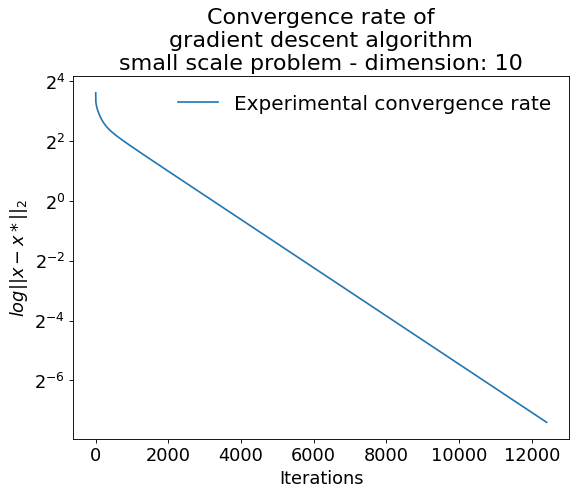


The large scale problem is chosen. The matrix A and vector b dimension is 100
The number of maximum iterations is 40000. The allowed tolerance for gradient norm is 0.01

The gradient descent algorithm runs in 9.819963932037354 seconds
Reason of stopping
Max iterations (40000) exceeded

The optimal solution x found by gradient descent algorithm
[ 10.80954396  13.53080539  12.34048827  13.56010399  13.21795864
   3.44248581   2.58263856   9.56551187   2.56131046  10.9542098
   2.02486301  17.76882364  17.15608743  14.20430406  16.40691544
   8.04793459  22.89717879  33.23654019  17.13214426  23.06360859
   8.69197351  21.62729296  28.15997518  25.24696302  19.44788055
  28.4998845   31.10315707  32.34107394  23.97768023  28.70397213
  33.47529818  31.31788127  30.57097049  42.9701813   25.36785319
  44.08458021  42.57848789  49.70319644  40.79161149  43.17582171
  39.66958338  29.48079611  53.8984904   43.90625763  46.05410526
  45.78675598  37.05648298  58.2827156   54.04590147  44.936

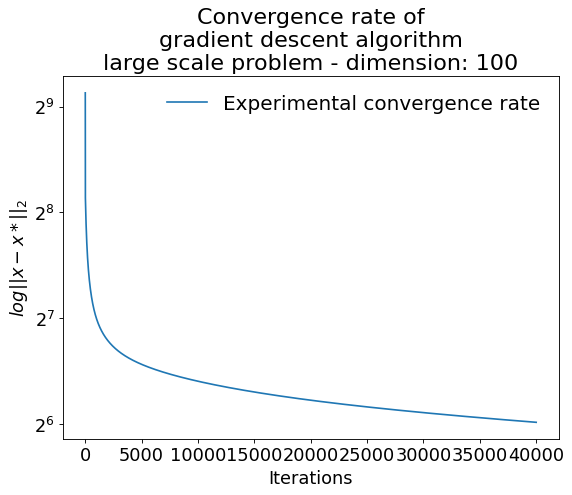


The huge scale problem is chosen. The matrix A and vector b dimension is 1000
The number of maximum iterations is 60000. The allowed tolerance for gradient norm is 1.0

The gradient descent algorithm runs in 34.8260064125061 seconds
Reason of stopping
Max iterations (60000) exceeded

First 100 values in the optimal solution x found by gradient descent algorithm
[-10.63174488  63.37143999 157.67587662 -28.98040714  18.44819265
   8.89392715  91.04566023  42.1484773  106.46289367  56.4020265
  70.9809846   67.83963515  82.22141957  70.79467462 163.73643644
  17.01598209 -52.40830661  49.13319062  45.59715111 149.41525211
  43.00752814  44.7106021  -21.74792399 127.86263676  74.14244684
  79.51530711  22.52373491 -24.35930537 -18.73706392 -23.63218186
  -3.24740986 115.55521407 139.73619666 133.63803682  46.38450882
 -60.23245944 192.40687214  57.71963766  62.39052301 -38.6454732
  41.17525845  31.5090981   71.09865821  45.91672493 103.90332947
 153.50563552 -13.61070701 114.34910011 240

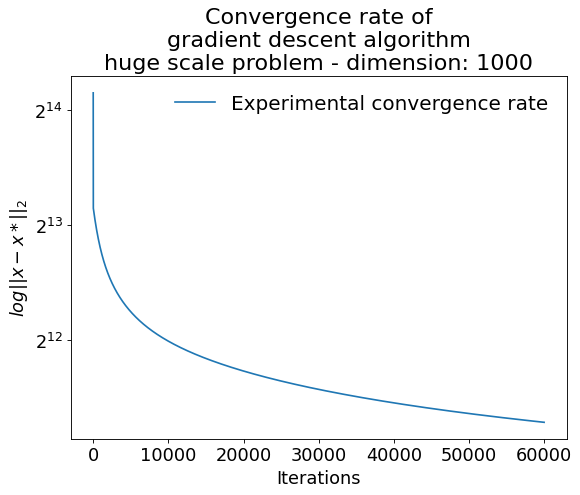

In [57]:
# There are three different scales: small, large and huge
scales = ["small", "large", "huge"]
# Number of maximum iterations of the three scales small, large and huge
maxIters = [20000, 40000, 60000]
# Tolerance of the gradient norm of the three scales small, large and huge
tolerances = [10e-5, 10e-3, 10e-1]
# The algorithm 
algorithmName = "gradient descent"
algorithm = gradientDescent
# The logarithm base
logBase = 2
# Running optimization for the three scales small, large and huge
for i in range(0,3):
    plotDifferenceNorms(scales[i], maxIters[i], tolerances[i], algorithmName, algorithm, logBase)

From the three graphs, it appears that the implemented gradient descent has a sublinear to nearly linear convergence rate.

I use base 2 logarithm because the convergence rate of gradient descent only decreases linearly, as base 10 is big and the graph will not show any information on the y-axis

For the small scale problem, gradient descent returns optimal solution close to x* 

For the large scale problem, gradient descent returns suboptimal solution that has the same pattern as x*

For the huge scale problem, gradient descent returns suboptimal solution that is still far from x* because the dimension is too large (1000)

# Task 2: Conjugate Gradient Algorithm

<img src="images\Task2.png">
<img src="images\conjugateGradient.png">

## Conjugate gradient algorithm implementation

In [58]:
def conjugateGradient(A, b, maxIters = 5000, epsilon = 10e-5, period = 100):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # The Lipschitz constant
    L = np.max(np.linalg.eigvals(A))
    # The step size is alpha = 1/L
    alpha = 1/L
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = [x]

    gradients = []
    gradientNorms = []

    rhos = []
    
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        if (iter % period == 1):
            gradientNorms.append(gradientNorm(A,b,x))
            gradientVector = gradient(A, b, x)
            gradients.append(gradientVector)
            rho = - gradientVector
            rhos.append(rho)
            x = x + alpha * rho
            x_iterations.append(x)        
        else:
            gradientNorms.append(gradientNorm(A,b,x))
            gradients.append(gradient(A, b, x))
            delta = (gradientNorms[iter - 1] ** 2)/(gradientNorms[iter - 2] ** 2)
            rho = - gradients[iter - 1] + delta * rhos[iter - 2]
            rhos.append(rho)
            x = x + alpha * rho
            x_iterations.append(x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter}"
    return (x, x_iterations, stoppingReason)

## Conjugate gradient algorithm convergence rate analysis


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.0001

The conjugate gradient algorithm runs in 0.009025812149047852 seconds
Reason of stopping
Gradient norm smaller than 0.0001
Completed iteration: 467

The optimal solution x found by conjugate gradient algorithm
[1.00113074 2.00040352 3.0014233  4.00135845 5.00073744 5.99799636
 7.00095232 7.99627049 8.99914574 9.99935844]

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]


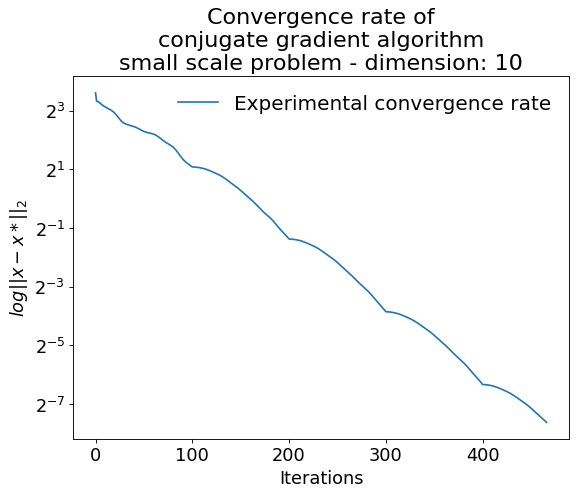


The large scale problem is chosen. The matrix A and vector b dimension is 100
The number of maximum iterations is 40000. The allowed tolerance for gradient norm is 0.01

The conjugate gradient algorithm runs in 3.840991973876953 seconds
Reason of stopping
Gradient norm smaller than 0.01
Completed iteration: 9823

The optimal solution x found by conjugate gradient algorithm
[ 1.11845736  3.82449596  5.59523166  5.98512795  8.37384602  5.92841262
  8.13534334  8.18346144  9.21724186 11.52938575  7.16282571 12.55292507
  9.99412557 13.55998946 15.8113756  14.63876449 18.55548775 21.29674155
 18.01564307 20.73430025 19.27528084 20.65206849 21.40484399 23.25767325
 24.43084158 25.58133179 28.70759418 29.75083553 27.78756451 31.44894691
 32.68742246 31.56959598 34.3672904  34.67444323 32.67273952 35.97099353
 37.24588129 39.96257566 38.08324313 40.15028579 43.89269533 39.40561199
 45.94381356 43.37593535 44.08142957 46.09508346 45.84955739 49.46344864
 51.58919538 48.07725847 50.62617696 49

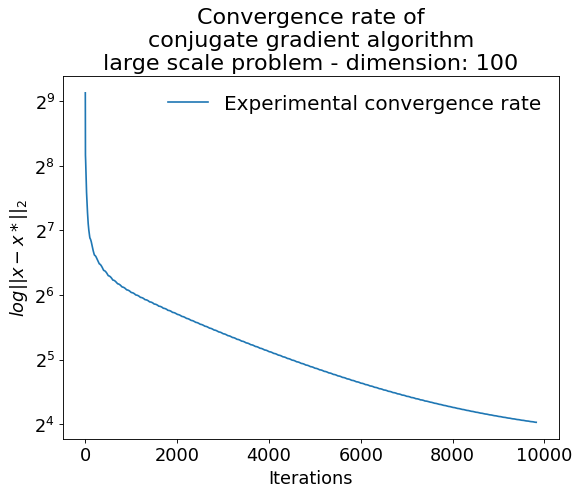


The huge scale problem is chosen. The matrix A and vector b dimension is 1000
The number of maximum iterations is 60000. The allowed tolerance for gradient norm is 1.0

The conjugate gradient algorithm runs in 22.06999945640564 seconds
Reason of stopping
Gradient norm smaller than 1.0
Completed iteration: 23630

First 100 values in the optimal solution x found by conjugate gradient algorithm
[-3.32597261e+01  2.67394699e+01  3.65614952e+01 -1.66945474e+01
  5.76708378e+00  3.58056494e+01 -1.59294870e+01  2.36735775e+01
  1.97478852e+01  5.82344457e+01  2.99316448e+01 -1.91287839e+01
  2.75501216e+01  1.61975741e+01  5.30509243e+01  7.93120223e-02
  1.73846033e+01  5.95173660e+00  5.26046964e+01  8.68809282e+01
  2.31772120e+01 -1.91380419e+01  1.73136072e+01  3.51953234e+01
  1.25673999e+02  3.15630144e+01 -7.46888261e+00  1.66473683e+01
  4.20094226e+01  3.72441865e+00 -1.91348219e+01  5.74741411e+01
  9.67722766e+01  6.69688270e+01  6.33407970e+01  2.21848958e+01
  9.39510118e+01  1

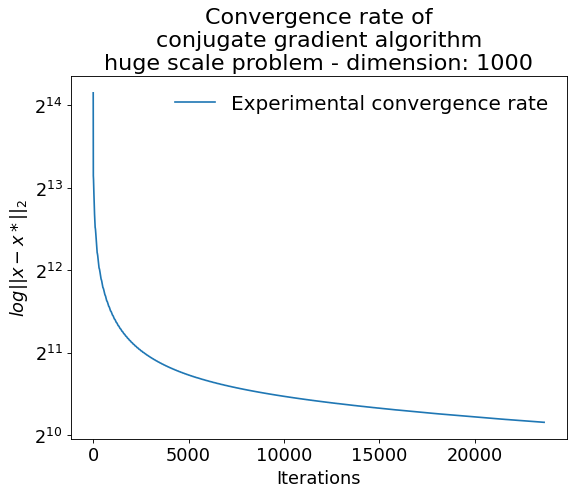

In [59]:
# There are three different scales: small, large and huge
scales = ["small", "large", "huge"]
# Number of maximum iterations of the three scales small, large and huge
maxIters = [20000, 40000, 60000]
# Tolerance of the gradient norm of the three scales small, large and huge
tolerances = [10e-5, 10e-3, 10e-1]
# The algorithm 
algorithmName = "conjugate gradient"
algorithm = conjugateGradient
# The logarithm base
logBase = 2
# Running optimization for the three scales small, large and huge
for i in range(0,3):
    plotDifferenceNorms(scales[i], maxIters[i], tolerances[i], algorithmName, algorithm, logBase)

From the three graphs, it appears that the implemented conjugate gradient has a superlinear convergence rate.

For the small scale problem, conjugate gradient returns optimal solution close to x* 

For the large scale problem, conjugate gradient returns a solution whose value has an increasing trend like x*

For the huge scale problem, conjugate gradient returns suboptimal solution, although it still has an increasing trend like x*

By increasing trend, I mean I have deliberately chosen x* to be increasing natural numbers to easily test the result returned by the algorithms 

The conjugate gradient also shows noticeable turbulence during the early iterations where the errors start to reduce significantly

# Task 3: FISTA algorithm
FISTA is acronym of "Fast Iterative Shrinkage-Thresholding Algorithm"

<img src="images\Task3.png">
<img src="images\FISTA.png">

## FISTA algorithm implementation

In [44]:
def FISTA(A, b, maxIters = 5000, epsilon = 10e-5):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x0 filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # assign y1 equals to x0
    y = x
    # assign t equals to 1
    t = 1
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = [x]
    y_iterations = []
    t_iterations = []

    gradients = []
    
    # The Lipschitz constant
    L = np.max(np.linalg.eigvals(A))
    # The step size is alpha = 1/L
    alpha = 1/L
    
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        # For example, this is the first iteration, where k = 1 (iter = 1)
        # Saving the previous x, which is x0
        previous_x = x
        # x is now x1, y ix now y1
        x = y - alpha * gradient(A, b, y)
        x_iterations.append(x)
        # Saving the previous t, which is t1
        previous_t = t
        # t is now t2 and the latter t is still t1
        t = 1/2 * (1 + math.sqrt(1 + 4 * (previous_t ** 2)))
        # y is now y2, x is x1 and x_previous is x0
        y = x + (previous_t - 1)/t * (x - previous_x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter - 1}"

    return (x, x_iterations, stoppingReason)

## FISTA algorithm convergence rate analysis


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.0001

The FISTA algorithm runs in 0.021035194396972656 seconds
Reason of stopping
Gradient norm smaller than 0.0001
Completed iteration: 1618

The optimal solution x found by FISTA algorithm
[ 0.99882646  1.99899609  2.99909342  3.99902631  4.99919153  6.00173722
  6.99881059  8.00366691  9.00111356 10.00085021]

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]


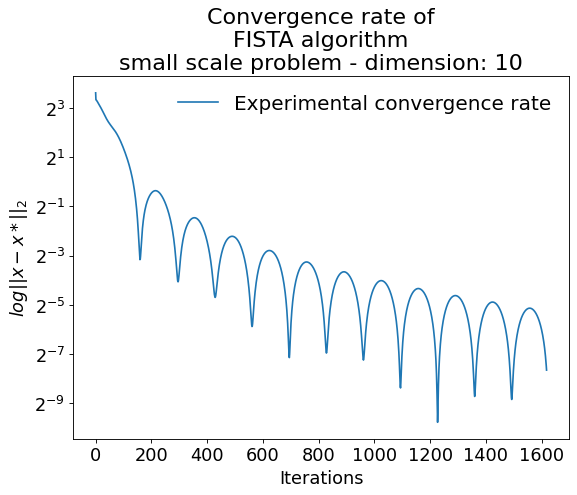


The large scale problem is chosen. The matrix A and vector b dimension is 100
The number of maximum iterations is 40000. The allowed tolerance for gradient norm is 0.01

The FISTA algorithm runs in 1.0489630699157715 seconds
Reason of stopping
Gradient norm smaller than 0.01
Completed iteration: 4038

The optimal solution x found by FISTA algorithm
[  0.5804197    3.49937851   4.89739875   5.43814026   8.2733384
   6.06932763   8.32561155   8.58557714   9.73348927  10.82446087
   7.71904481  11.20116919   9.67236023  13.36241332  15.35118423
  14.87964507  18.04439859  20.17234125  18.63427131  21.34265901
  20.38616586  21.05935953  21.35136413  22.7698276   24.30630488
  25.21044793  29.10143877  29.66149567  27.76431124  31.91013713
  32.62781383  31.5158694   34.72057296  33.51675469  33.61008684
  35.43708197  36.33179422  39.16351096  37.97249797  40.45407114
  43.7780257   40.50797794  44.62097971  43.4433036   43.96178159
  46.02935254  46.97377021  48.10345962  50.94346539  4

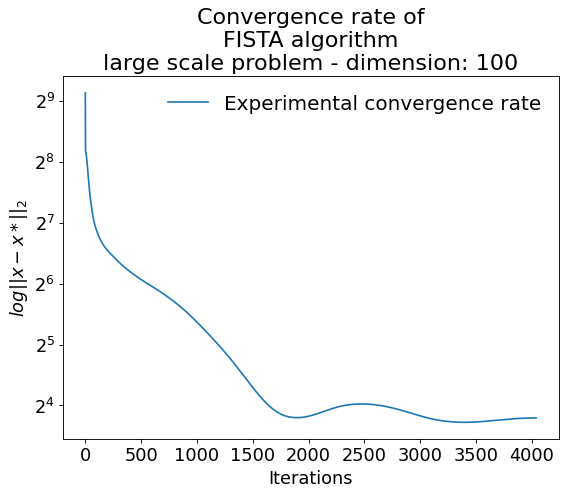


The huge scale problem is chosen. The matrix A and vector b dimension is 1000
The number of maximum iterations is 60000. The allowed tolerance for gradient norm is 1.0

The FISTA algorithm runs in 8.035976886749268 seconds
Reason of stopping
Gradient norm smaller than 1.0
Completed iteration: 10184

First 100 values in the optimal solution x found by FISTA algorithm
[  3.17758067  13.90709143   6.2257751   12.74674775  -9.2641401
  25.04514651   1.18279701  11.11102729  -1.00895173  50.32358794
  32.52995236   7.83888725  15.39044038   9.99965363  15.17581813
  -6.08194271  39.45570317  22.68464105  27.96035342  33.06690366
  20.47455608   9.90012816  18.38430427  39.78134304  28.19009002
  50.51040477  26.38980085  54.63117852  45.14140792  31.76175477
  20.50274681  23.66084756  67.93184858  43.61313347  37.79765888
  -4.35895841  51.81728362  41.89768425  35.45183519  46.97417003
  29.65361469  36.69807236  68.0127728   36.24465202  23.11418608
  33.22279616  40.23792797  43.874091

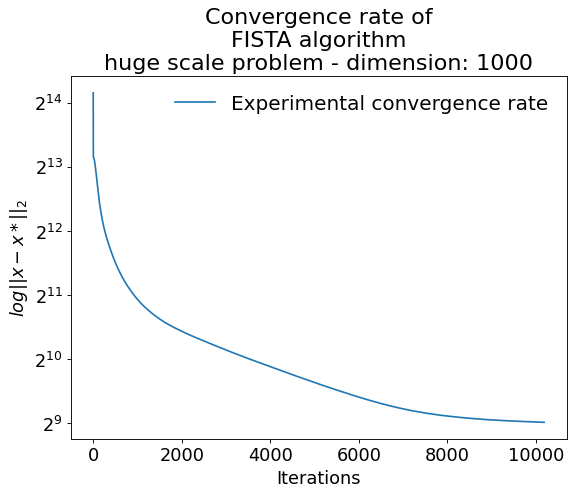

In [60]:
# There are three different scales: small, large and huge
scales = ["small", "large", "huge"]
# Number of maximum iterations of the three scales small, large and huge
maxIters = [20000, 40000, 60000]
# Tolerance of the gradient norm of the three scales small, large and huge
tolerances = [10e-5, 10e-3, 10e-1]
# The algorithm 
algorithmName = "FISTA"
algorithm = FISTA
# The logarithm base
logBase = 2
# Running optimization for the three scales small, large and huge
for i in range(0,3):
    plotDifferenceNorms(scales[i], maxIters[i], tolerances[i], algorithmName, algorithm, logBase)

From the three graphs, it appears that the implemented FISTA has a superlinear convergence rate.

For the small scale problem, FISTA returns optimal solution close to x* 

For the large scale problem, FISTA returns optimal solution that is also close to x*

For the huge scale problem, FISTA returns suboptimal solution again, because the dimension is too large (1000)

FISTA has unique pattern, whose errors rise and fall in a periodic manner. However, this behavior is only observed in small dimension problems (10). For large dimensions like 100 and 1000, FISTA doesn't seem to show this periodic error behavior

# Task 4: Coordinate Descent Algorithm

<img src="images\Task4.png">
<img src="images\coordinateDescent1.png">
<img src="images\coordinateDescent2.png">

## Deterministic (cyclic) coordinate descent algorithm implementation

In [46]:
def coordinateDescent(A, b, maxIters = 5000, epsilon = 10e-5, period = 100):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # The Lipschitz constant
    L = np.max(np.linalg.eigvals(A))
    # The step size is alpha = 1/L
    alpha = 1/L
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = []

    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        for index in range(0, dim):
            x_totalGradient = x - alpha * gradient(A, b, x)
            x_partialGradient = copy.deepcopy(x) 
            x_partialGradient[index] = x_totalGradient[index]
            x = copy.deepcopy(x_partialGradient)
            x_iterations.append(x)
            iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}"
    return (x, x_iterations, stoppingReason)

## Coordinate descent algorithm convergence rate analysis


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.0001

The coordinate descent algorithm runs in 0.1549978256225586 seconds
Reason of stopping
Max iterations (20000) exceeded

The optimal solution x found by coordinate descent algorithm
[1.47699082 2.35781817 3.46787914 4.50929597 5.40624933 5.13076524
 7.5507039  6.31390472 8.56043183 9.65492076]

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]


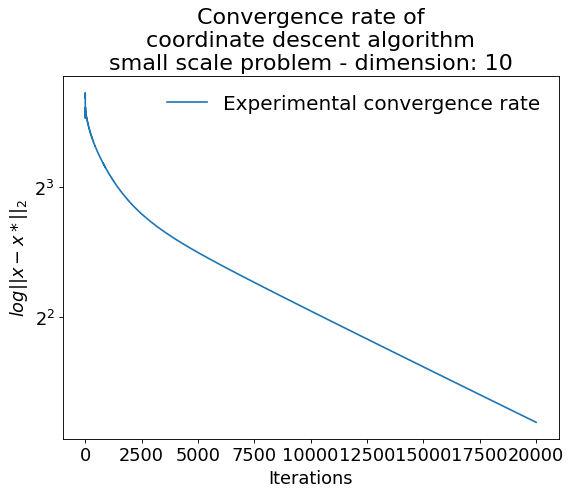


The large scale problem is chosen. The matrix A and vector b dimension is 100
The number of maximum iterations is 40000. The allowed tolerance for gradient norm is 0.01

The coordinate descent algorithm runs in 5.4509971141815186 seconds
Reason of stopping
Max iterations (40000) exceeded

The optimal solution x found by coordinate descent algorithm
[18.4854829  44.25797993 33.84664296 39.61234692 43.26652519 -0.82146242
 15.00451965 52.11998119 10.76369715 25.1453549  28.87342704 37.68531833
 44.19373803 45.315784   24.7130248  39.4887291  39.58141494 57.33326627
 26.06927215 39.95258182 15.22478807  4.79245542 66.18112869 48.69361618
 18.27821879 50.73646993 47.50715397 32.42348842 34.52312645 50.71650713
 60.63219618 42.21262062 41.34583668 45.13040413 25.36149809 65.30948681
 75.59908436 82.54055454 85.61344422 67.17576163 39.51059327 36.51296661
 45.63694754 41.39579049 54.17594465 39.74886786 47.9720558  71.45948733
 62.09519968 44.51460762 39.8757539  51.34473849 57.75974209 53.

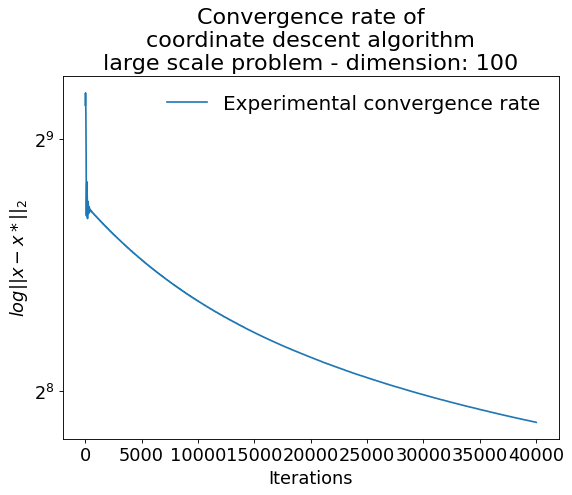


The huge scale problem is chosen. The matrix A and vector b dimension is 1000
The number of maximum iterations is 60000. The allowed tolerance for gradient norm is 1.0

The coordinate descent algorithm runs in 20.09000062942505 seconds
Reason of stopping
Max iterations (60000) exceeded

First 100 values in the optimal solution x found by coordinate descent algorithm
[786.36500442 759.42701392 783.74774341 744.80662387 753.08825931
 742.78808719 760.18211188 777.27424516 757.91373402 758.12745557
 766.10996105 750.37865797 766.10471747 764.91040497 760.78579612
 758.11719986 747.67318075 749.62924301 746.1362748  750.95497023
 752.17386221 778.96218249 747.4290864  714.79019894 758.97535057
 747.10343406 727.02081922 750.73859498 750.97628318 738.76970634
 736.07352565 764.37012303 739.62066681 739.31938756 739.60957661
 749.5229503  739.1625242  737.6346086  715.51621968 753.15318817
 747.93541246 744.19403141 727.84812933 723.57128145 747.46835544
 765.6173821  741.40360752 762.00495

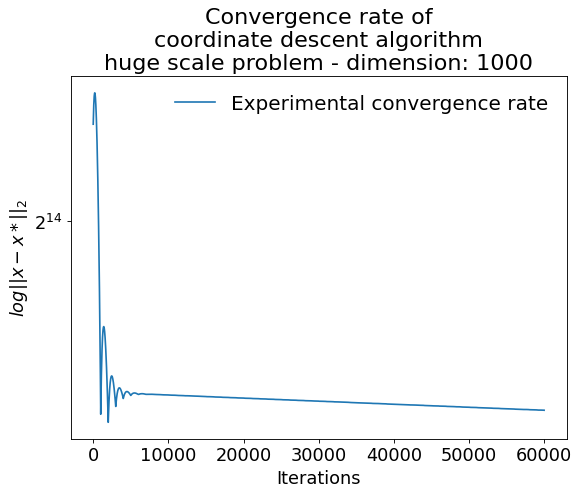

In [61]:
# There are three different scales: small, large and huge
scales = ["small", "large", "huge"]
# Number of maximum iterations of the three scales small, large and huge
maxIters = [20000, 40000, 60000]
# Tolerance of the gradient norm of the three scales small, large and huge
tolerances = [10e-5, 10e-3, 10e-1]
# The algorithm 
algorithmName = "coordinate descent"
algorithm = coordinateDescent
# The logarithm base
logBase = 2
# Running optimization for the three scales small, large and huge
for i in range(0,3):
    plotDifferenceNorms(scales[i], maxIters[i], tolerances[i], algorithmName, algorithm, logBase)

From the three graphs, it appears that the implemented coordinate descent has a sublinear convergence rate.

For the small scale problem, coordinate descent returns optimal solution close to x* 

For the large scale problem, coordinate descent returns suboptimal solution that has the same pattern as x*

For the huge scale problem, coordinate descent returns suboptimal solution that is still far from x*, again because the dimension is too large (1000)

Coordinate descent error graphs seem to resemble a wavelength gradually flattening out from the earliest iterations until later iterations

# Task 5: Comparison between the algorithms

In [64]:
# Plotting the difference norms log ||x - x*||2
def plotDifferenceNormsMutipleAlgorithms(scale, maxIter, tolerance, algorithmNames, algorithms, logBase):

    A = np.load(f"data/{scale}Matrix.npy", allow_pickle=True)
    # print("The matrix A")
    # print(A)

    b = np.load(f"data/{scale}Vector.npy", allow_pickle=True)
    # print("\nThe vector b")
    # print(b)
    x_opt = np.load(f"data/{scale}Solution.npy", allow_pickle=True)

    print(f"\nThe {scale} scale problem is chosen. The matrix A and vector b dimension is {b.size}")
    print(f"The number of maximum iterations is {maxIter}. The allowed tolerance for gradient norm is {tolerance}" )

    if scale == "huge":
        print("\nFirst 100 values in the theoretical optimal solution x*")
        print(x_opt[0:100])
    else:
        print("\nThe theoretical optimal solution x*")
        print(x_opt)

    figure(figsize=(8, 6), dpi=80)

    for i in range(0, len(algorithms)):
        start = time.time()
        x_opt_algo, x_iterations_algo, stoppingReason = algorithms[i](A, b, maxIter, tolerance)
        end = time.time()

        differenceNorms = []
        for x_sol in x_iterations_algo:
            differenceNorms.append(differenceNorm(x_sol, x_opt))
        differenceNorms = np.array(differenceNorms)

        iterations = np.arange(0, differenceNorms.size, 1)
        plt.plot(iterations, differenceNorms, label = algorithmNames[i])#, marker='.', markersize=5)
    
    size = 16

    plt.title(f"Convergence rate comparison\nbetween optimization algorithms\n{scale} scale problem - dimension: {b.size}", size=size + 4)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log',base=logBase)
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    plt.legend(loc=4, frameon=False, fontsize=size, ncol=1)
    plt.show()


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 5000. The allowed tolerance for gradient norm is 0.0001

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]


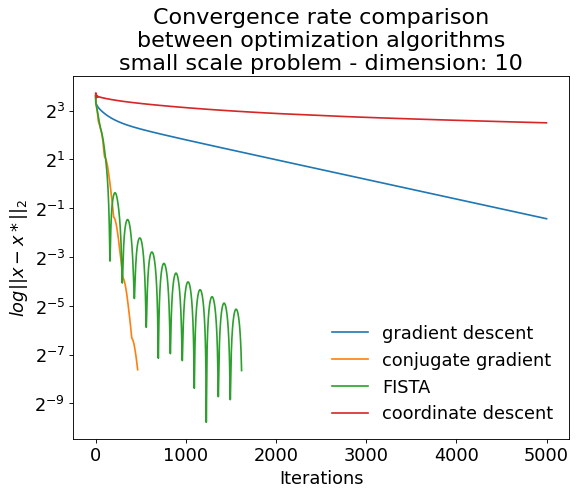


The large scale problem is chosen. The matrix A and vector b dimension is 100
The number of maximum iterations is 10000. The allowed tolerance for gradient norm is 0.01

The theoretical optimal solution x*
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


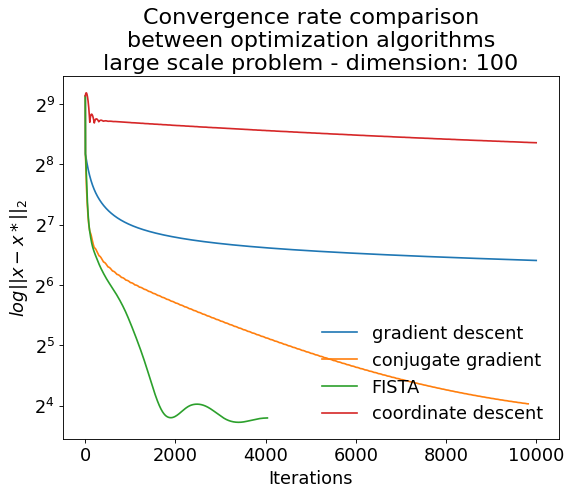


The huge scale problem is chosen. The matrix A and vector b dimension is 1000
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 1.0

First 100 values in the theoretical optimal solution x*
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


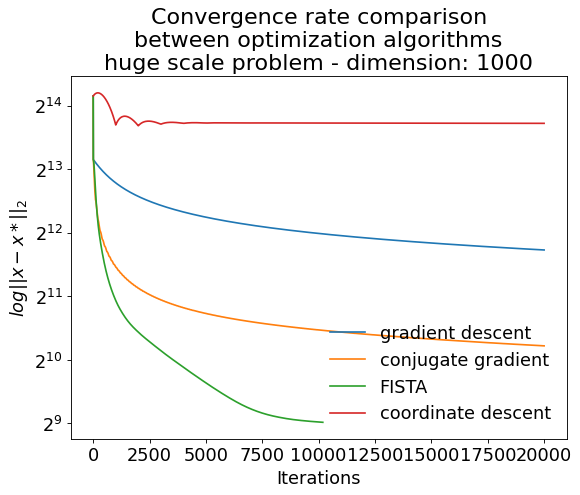

In [65]:
# There are three different scales: small, large and huge
scales = ["small", "large", "huge"]
# Number of maximum iterations of the three scales small, large and huge
maxIters = [5000, 10000, 20000]
# Tolerance of the gradient norm of the three scales small, large and huge
tolerances = [10e-5, 10e-3, 10e-1]
# The algorithm 
algorithmNames = ["gradient descent", "conjugate gradient", "FISTA", "coordinate descent"]
algorithms = [gradientDescent, conjugateGradient, FISTA, coordinateDescent] 
# The logarithm base
logBase = 2
for i in range(0,3):
    plotDifferenceNormsMutipleAlgorithms(scales[i], maxIters[i], tolerances[i], algorithmNames, algorithms, logBase)

From the three comparison graphs, we can finally conclude the performance of each algorithms

1. Gradient descent: Normal linear convergence rate in small dimension and slightly sublinear convergence rate in higher dimensions
2. Conjugate gradient: Fast superlinear convergence rate in all dimensions
3. FISTA: extremely fast superlinear convergence rate in all dimensions
4. Coordinate descent: Slow sublinear convergence rate in all dimensions

The speed of convergence rankings are therefore:

- Small dimension (10): conjugate gradient > FISTA > gradient descent > coordinate descent
 
- Large dimension (100): FISTA > conjugate gradient > gradient descent > coordinate descent

- Huge dimension (1000): FISTA > conjugate gradient > gradient descent > coordinate descent   


Gradient descent is popular in many ML algorithms and solvers in deep learning. Particularly, stochastic gradient descent is much more useful in batches training, where updating the training performance with the whole data is expensive or impossible.

Conjugate gradient is applicable to sparse systems that are too large to be handled by a direct implementation or other direct methods such as the Cholesky decomposition

FISTA is the fastest algorithm and is robust against large dimensions, making it highly suitable for solving many optimization problems involving a large number of parameters. 

Coordinate descent should be used for problems where individual updates are much easier than the whole updates of all components, such as LASSO method in ML. Therefore, coordinate descent is useful in distributed optimization problem. 

Visually, gradient descent is going in straight line in a Euclidean map towards the optimum, while coordinate descent follows along only one variable at a time like a stair case, which means it traverse the Manhattan distance towards the optimum. As a result, the gradient descent strictly converges faster than coordinate descent because straight line distance is always larger than the Manhattan distance.

Conclusion: We should use FISTA for large scale problems and conjugate gradient for small scale problems, if applicable, thanks to their fast convergence speed. If not, (stochastic) gradient descent is highly recommended, as it has been implemented for many existing problems. If individual updating is much easier than total updates, coordinate descent is the most suitable algorithm
